In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import helpers.data_mining_helpers as dmh
%matplotlib inline

In [2]:
file = open('amazon_cells_labelled.txt', mode='r')

In [3]:
print(file.read())

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

# Import Data
導入三個data 並且 concat 前兩個(為了後面貝式分類器我們留一組做TEST

In [4]:
file=pd.read_csv('amazon_cells_labelled.txt',sep='\t',header=None)

In [5]:
file

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [6]:
file1=pd.read_csv('imdb_labelled.txt',sep='\t',header=None)

In [7]:
file1

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [8]:
file2=pd.read_csv('yelp_labelled.txt',sep='\t',header=None)

In [9]:
file2

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [10]:
res=pd.concat([file,file1],axis=0,ignore_index=True)

In [11]:
res

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
1743,I just got bored watching Jessice Lange take h...,0
1744,"Unfortunately, any virtue in this film's produ...",0
1745,"In a word, it is embarrassing.",0
1746,Exceptionally bad!,0


In [12]:
res.columns=['sentence','category']

In [13]:
res

,sentence,category
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
1743,I just got bored watching Jessice Lange take h...,0
1744,"Unfortunately, any virtue in this film's produ...",0
1745,"In a word, it is embarrassing.",0
1746,Exceptionally bad!,0


# Add columne
把0 1改成 positve and negative 增加可讀性

In [14]:
category_name=['negative','positive']

In [15]:
res['category_name'] = None

In [16]:
res

,sentence,category,category_name
0,So there is no way for me to plug it in here i...,0,None
1,"Good case, Excellent value.",1,None
2,Great for the jawbone.,1,None
3,Tied to charger for conversations lasting more...,0,None
4,The mic is great.,1,None
...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,None
1744,"Unfortunately, any virtue in this film's produ...",0,None
1745,"In a word, it is embarrassing.",0,None
1746,Exceptionally bad!,0,None


In [17]:
i=0
for t in res['category']:
    res['category_name'][i]=category_name[t]
    i+=1

C:\Users\oscar\AppData\Local\Temp\ipykernel_9540\1367221191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['category_name'][i]=category_name[t]


In [18]:
res

,sentence,category,category_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,negative
1744,"Unfortunately, any virtue in this film's produ...",0,negative
1745,"In a word, it is embarrassing.",0,negative
1746,Exceptionally bad!,0,negative


#  Missing Values check

In [19]:
res.isnull()

,sentence,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1743,False,False,False
1744,False,False,False
1745,False,False,False
1746,False,False,False


In [20]:
res.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)

,sentence,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


# Duplicate Data check

In [21]:
res.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1743    False
1744    False
1745    False
1746    False
1747    False
Length: 1748, dtype: bool

In [22]:
sum(res.duplicated())

13

In [23]:
sum(res.duplicated('sentence')) #有重複,dealing with it

13

In [24]:
len(res)

1748

In [25]:
res.drop_duplicates(keep='first', inplace=True) # 重複資料僅保留一筆

In [26]:
len(res) #扣掉了13筆

1735

#  Data Preprocessing

## Sampling

In [27]:
res_samp=res.sample(n=800) #取 1200 的sample 

In [28]:
res_samp[0:4]

,sentence,category,category_name
519,I am not impressed with this and i would not r...,0,negative
1055,And generally the lines and plot is weaker tha...,0,negative
1329,And if that isn't enough of a mess of a movie ...,0,negative
1179,I really loved the story line and the poler be...,1,positive


positive    877
negative    858
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

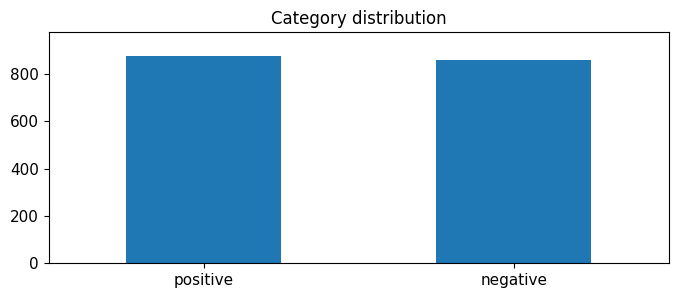

In [29]:
print(res.category_name.value_counts())
x=max(res.category_name.value_counts())
# plot barchart for X
res.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,x+100],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

可以看到取的結果符合平均

877
negative    403
positive    397
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

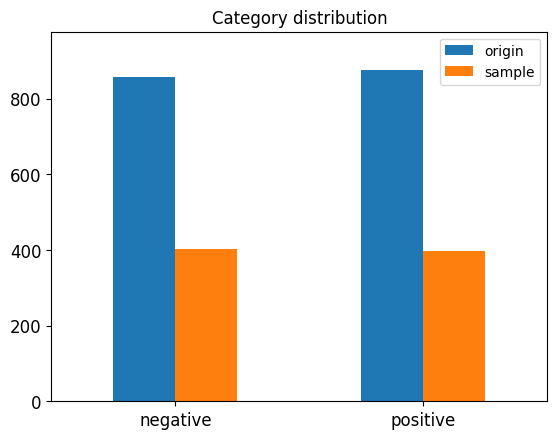

In [30]:
#分開長條圖

print(res.category_name.value_counts().max())
print(res_samp.category_name.value_counts())

disp = pd.concat([res.category_name.value_counts(), res_samp.category_name.value_counts()], axis=1, sort=True)
disp.columns = ["origin", "sample"]

disp.plot(kind = 'bar',title = 'Category distribution',ylim = [0, res.category_name.value_counts().max()+100],
         rot = 0, fontsize = 12)

# Feature Creation

In [31]:
import nltk

In [32]:
# takes a like a minute or two to process
res['unigrams'] = res['sentence'].apply(lambda res: dmh.tokenize_text(res))

In [33]:
res[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [34]:
res

,sentence,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
1743,I just got bored watching Jessice Lange take h...,0,negative,"[I, just, got, bored, watching, Jessice, Lange..."
1744,"Unfortunately, any virtue in this film's produ...",0,negative,"[Unfortunately, ,, any, virtue, in, this, film..."
1745,"In a word, it is embarrassing.",0,negative,"[In, a, word, ,, it, is, embarrassing, .]"
1746,Exceptionally bad!,0,negative,"[Exceptionally, bad, !]"


# Feature subset selection

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
res_counts = count_vect.fit_transform(res.sentence) #learn the vocabulary and return document-term matrix
print(res_counts[0:])

  (0, 3293)	1
  (0, 3594)	1
  (0, 1915)	1
  (0, 2416)	1
  (0, 3960)	1
  (0, 1441)	1
  (0, 2235)	1
  (0, 3653)	1
  (0, 2679)	1
  (0, 1920)	1
  (0, 1817)	2
  (0, 1693)	1
  (0, 3581)	1
  (0, 3845)	1
  (0, 3811)	1
  (0, 1567)	1
  (0, 506)	1
  (0, 801)	1
  (1, 1574)	1
  (1, 552)	1
  (1, 1256)	1
  (1, 3868)	1
  (2, 1441)	1
  (2, 3581)	1
  (2, 1593)	1
  :	:
  (1731, 1377)	1
  (1731, 2764)	1
  (1731, 3104)	1
  (1731, 3901)	1
  (1731, 2910)	1
  (1732, 1915)	1
  (1732, 1920)	1
  (1732, 1817)	1
  (1732, 1171)	1
  (1732, 4049)	1
  (1733, 308)	1
  (1733, 1261)	1
  (1734, 3653)	1
  (1734, 1817)	1
  (1734, 2462)	1
  (1734, 2482)	1
  (1734, 2314)	1
  (1734, 3947)	1
  (1734, 184)	1
  (1734, 151)	2
  (1734, 1763)	1
  (1734, 182)	1
  (1734, 1924)	1
  (1734, 1877)	1
  (1734, 1872)	1


In [36]:
# We can check the shape of this matrix by:
res_counts.shape

(1735, 4100)

In [37]:
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18'],
      dtype=object)

# FEATURE Visualization

In [38]:
# we convert from sparse array to normal array
res_counts[0:5, 0:100].toarray()

res_count_list=res_counts.toarray().tolist()

term_frequencies = []
for j in range(0,res_counts.shape[1]):
    term_frequencies.append(sum(res_counts[:,j].toarray()))


In [39]:
res_count_list.insert(0,term_frequencies)                       #DOC-1=term_frequency Doc-2=term_name
res_count_list.insert(0,count_vect.get_feature_names_out())

ans_df=pd.DataFrame(res_count_list) #先把res_count_list轉DF 方便我做排序
ans_df.index=['doc'+str(i-2) for i in range(1737)] #重設index name

#印出來看看
ans_df

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,4096,4097,4098,4099
doc-2,10,100,11,12,13,15,15g,15pm,17,18,...,your,yourself,youthful,youtube,yun,z500a,zero,zillion,zombie,zombiez
doc-1,[31],[1],[1],[2],[3],[2],[1],[1],[1],[1],...,[56],[1],[1],[1],[1],[1],[1],[1],[2],[1]
doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc1730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#把陣列按詞頻 排序

rslt_df = ans_df.sort_values(by = ['doc-1'], axis = 1,ascending = False) #排序好後可以得到RSLT_DF
rslt_df

,3581,184,1920,1915,3605,2462,3653,1817,3943,3579,...,1720,1721,1722,1724,1728,1733,1734,1736,1737,4099
doc-2,the,and,it,is,this,of,to,in,was,that,...,ho,hockey,hoffman,holder,hollander,homework,honest,hook,hoot,zombiez
doc-1,[1367],[745],[636],[581],[497],[497],[449],[291],[276],[247],...,[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]
doc0,1,0,1,1,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc1730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1731,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
doc1732,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc1733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:20]]  #取前20筆資料來看
plot_y = [i for i in list(rslt_df.index)[2:22]]
plot_z = rslt_df.iloc[2:22, 0:20].to_numpy()

C:\Users\oscar\AppData\Local\Temp\ipykernel_9540\1209286203.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_x = ["term_"+str(i) for i in rslt_df.loc['doc-2'][0:20]]  #取前20筆資料來看


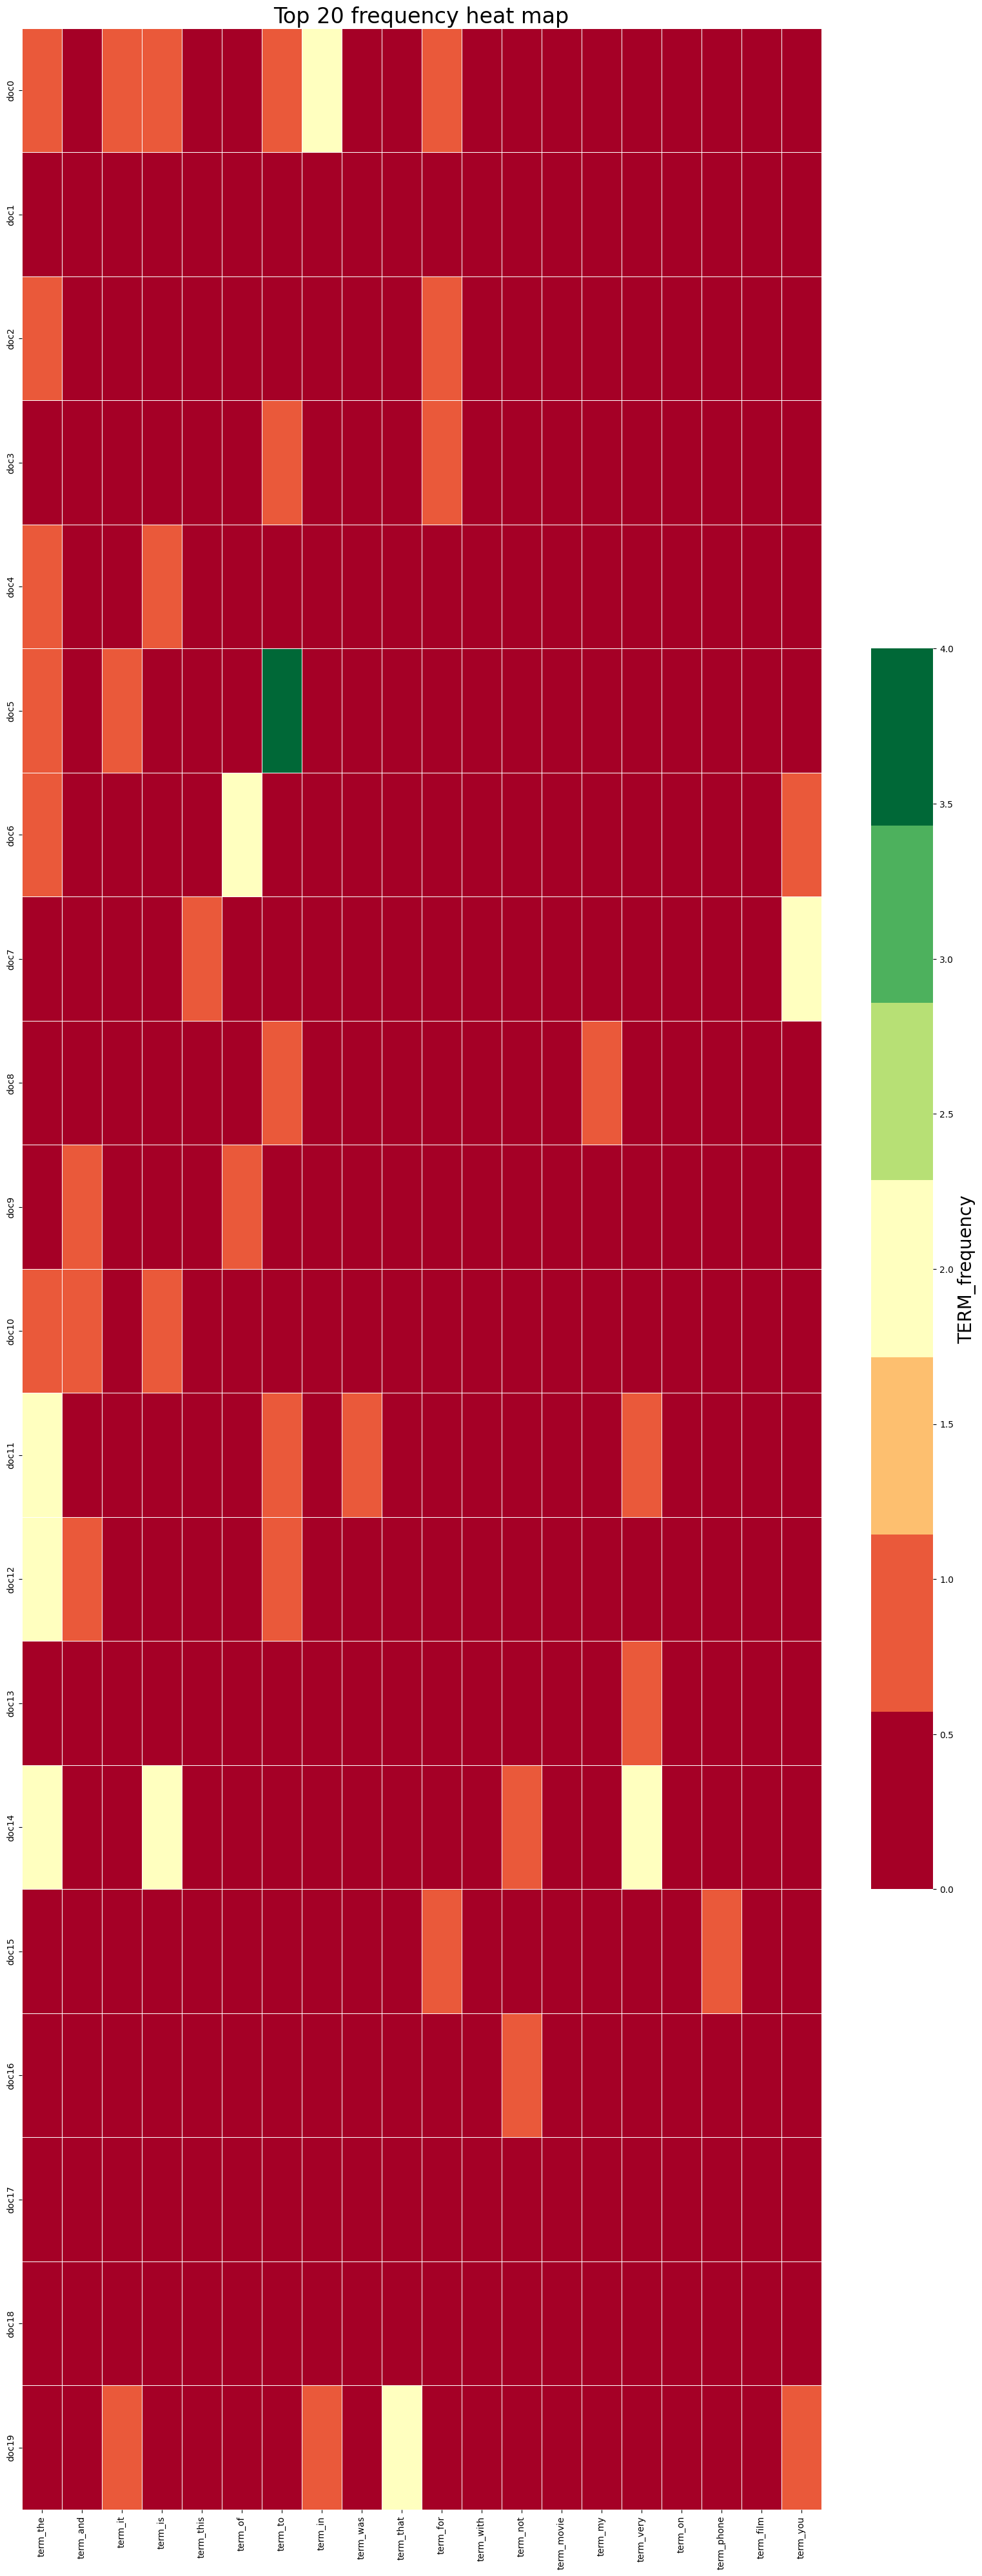

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw=df_todraw.astype('int') 


plt.figure(figsize = [20, 50]) #設定畫布大小

title = 'Top 20 frequency heat map'
plt.title(title,fontsize=24)
ax = sns.heatmap(df_todraw, fmt='f', linewidths = .5,
                 cmap = plt.cm.get_cmap('RdYlGn', 7), cbar_kws={
                     'label': 'TERM_frequency', 'shrink': 0.5})

ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

這個結果是表示說最常出現的前20個字中，前20筆資料包含了多少

# New Data Visualizations

## 把term frequnecy 依照label種類各自計算一個，嘗試查看哪些詞彙在該類別屬於前幾常出現

In [45]:
#這裡的執行會比較久，因為迴圈的寫法太粗糙... 我盡力了

positive_term_f=[]
negative_term_f=[]

for i in range(0,res_counts.shape[1]): 
    
    pos=0 #暫存pos term 的變數
    neg=0 #暫存Nega term 的變數
    
    for j in range(0,res_counts.shape[0]):
        
        if res.iloc[j]['category'] == 1:
            pos+=res_counts[j,i]
        elif res.iloc[j]['category'] == 0:
            neg+=res_counts[j,i]
            
    positive_term_f.append(pos)
    negative_term_f.append(neg)


In [46]:
rst_p=[]
rst_n=[]

name=np.array(count_vect.get_feature_names_out())

#將名字跟freq對上
for t,z in zip(name[0:],positive_term_f[0:]):
    rst_p.append([t,z])
    
for t,z in zip(name[0:],negative_term_f[0:]):
    rst_n.append([t,z])
    
#排序 大到小
rst_p_sort=sorted(rst_p,key=lambda row:(row[1]),reverse=True)    
rst_n_sort=sorted(rst_n,key=lambda row:(row[1]),reverse=True)    

#再重新拆開

x1=[i[0] for i in rst_p_sort]
y1=[i[1] for i in rst_p_sort]

x2=[i[0] for i in rst_n_sort]
y2=[i[1] for i in rst_n_sort]

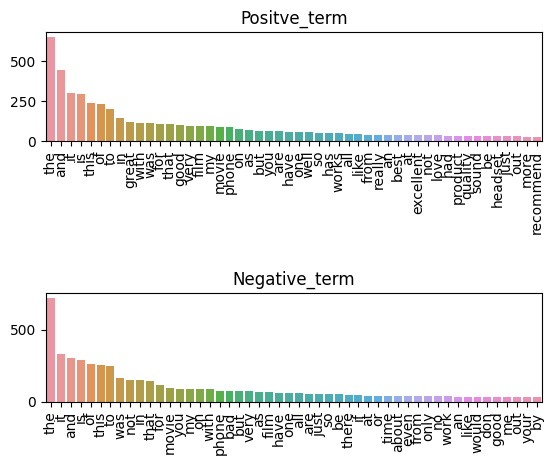

In [47]:
#做long tail觀察

fig = plt.figure()

fig.add_subplot(3,1,1)

g = sns.barplot(x=x1[:50], 
            y=y1[:50])
g.set(title='Positve_term')
g.set_xticklabels(x1[:50], rotation = 90);


fig.add_subplot(3,1,3)
g = sns.barplot(x=x2[:50], 
            y=y2[:50])
g.set(title='Negative_term')
g.set_xticklabels(x2[:50], rotation = 90);


In [48]:
print(positive_term_f[0])
print(negative_term_f[0])

20
11


# PCA 做2-D

In [49]:
from sklearn.decomposition import PCA

In [50]:
res_reduced = PCA(n_components = 2).fit_transform(res_counts.toarray())

In [51]:
res_reduced.shape

(1735, 2)

In [52]:
category_name

['negative', 'positive']

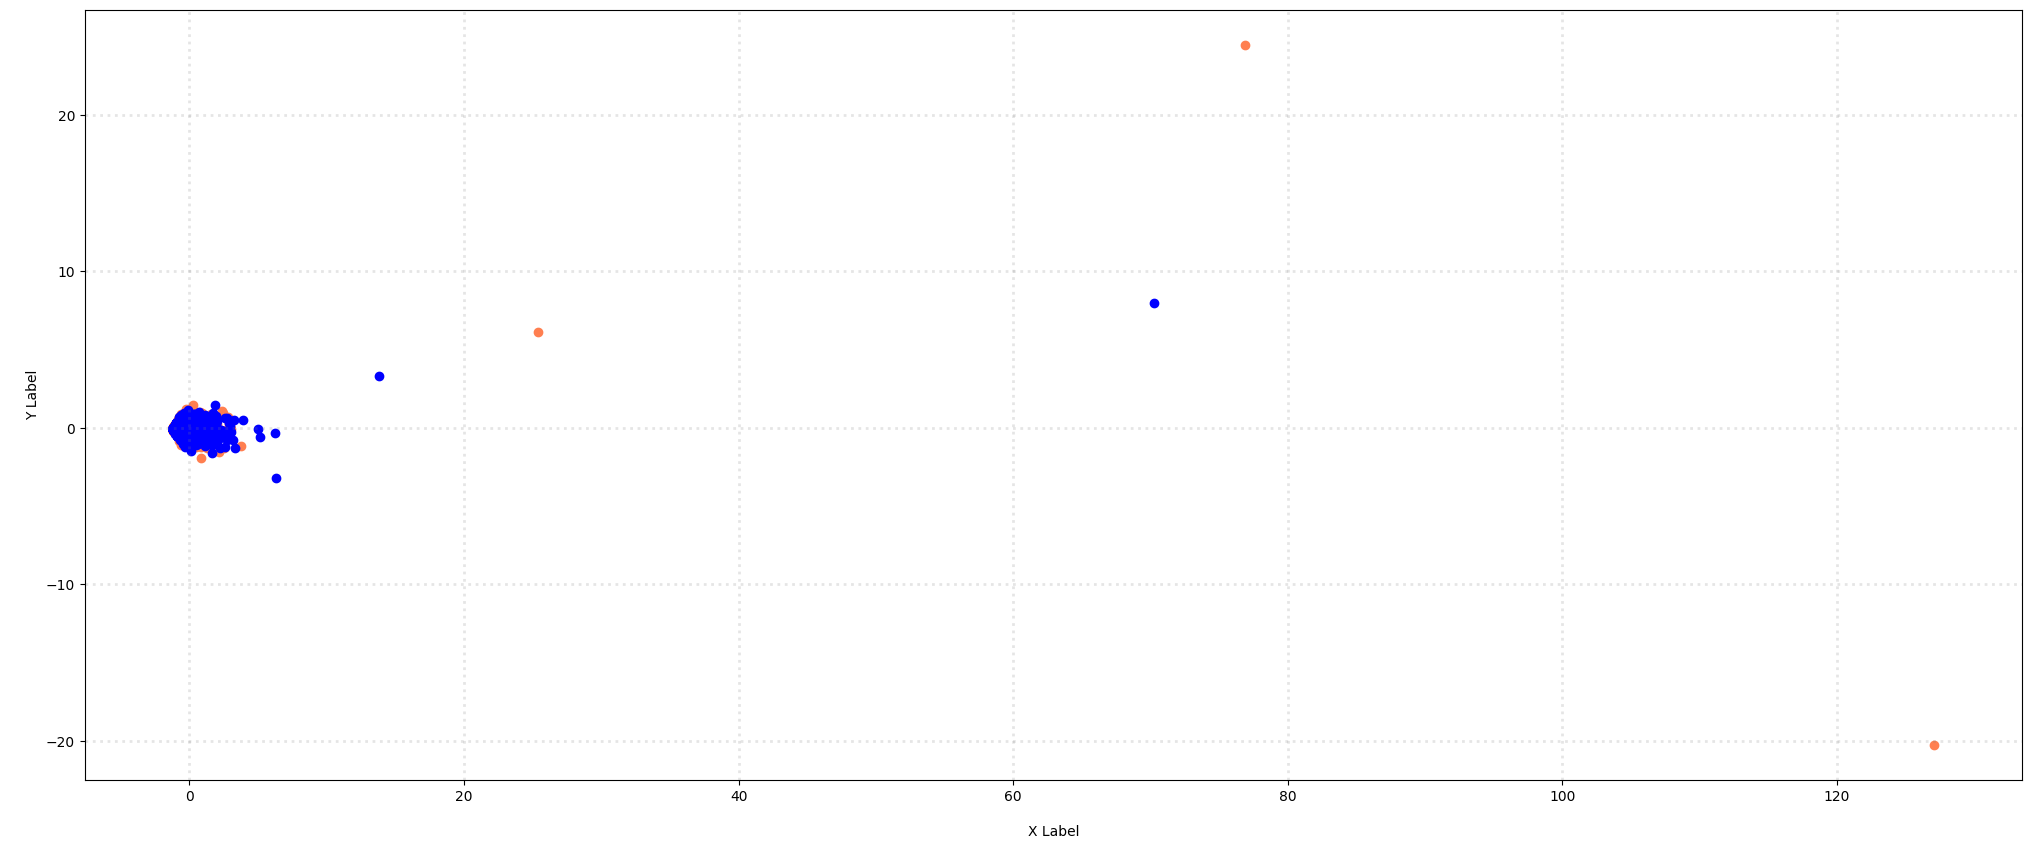

In [53]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, category_name):
    xs = res_reduced[res['category_name'] == category].T[0]
    ys = res_reduced[res['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# PCA 3-D

In [54]:
res_reduced3D = PCA(n_components = 3).fit_transform(res_counts.toarray())

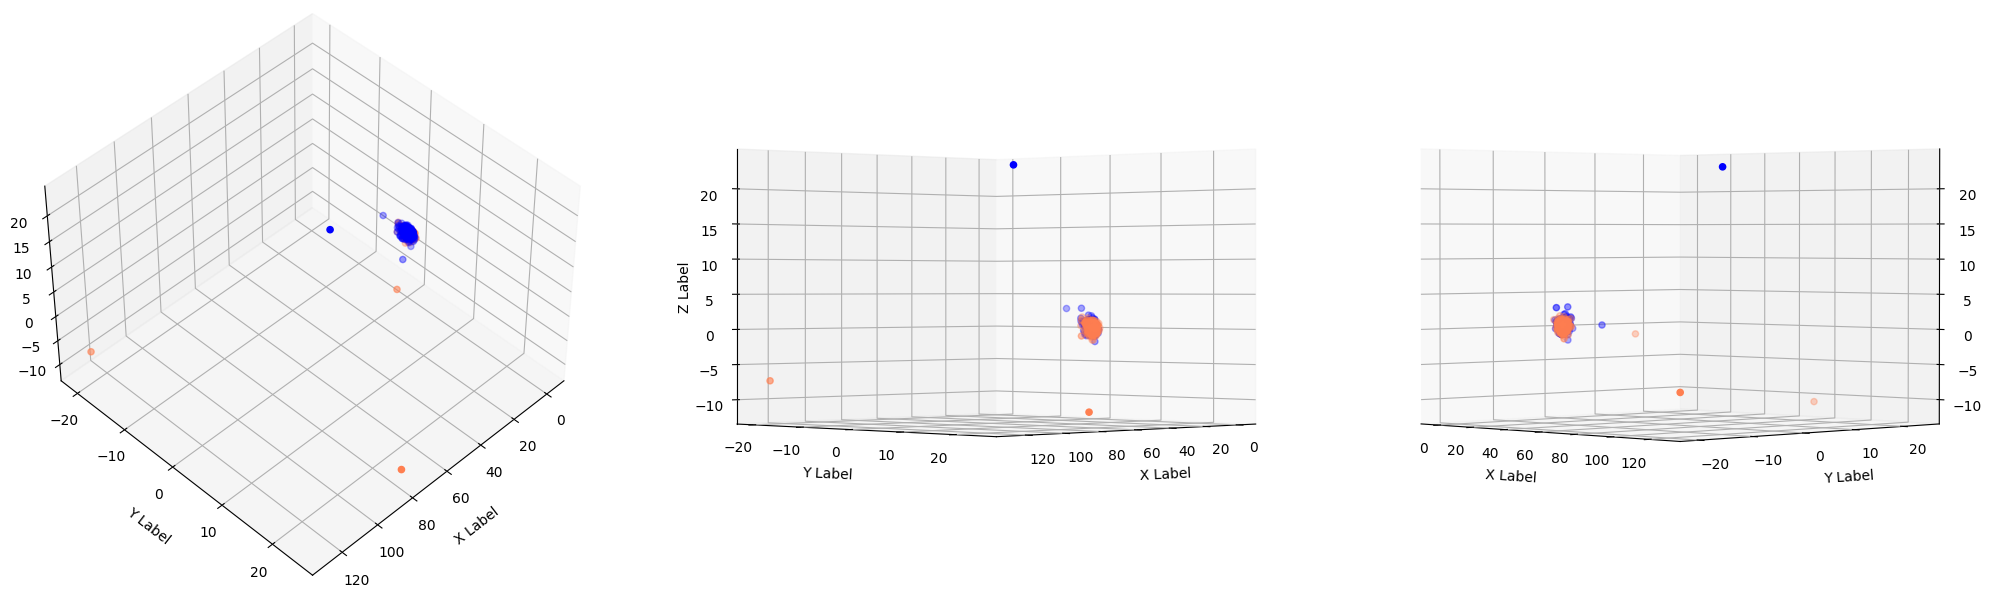

In [55]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,11))
ax = fig.add_subplot(1,3,1, projection='3d')  #畫在第一列 第一格
ay = fig.add_subplot(1,3,2, projection='3d')  #畫在第一列 第2格
az = fig.add_subplot(1,3,3, projection='3d')  #畫在第一列 第3格


for c, category in zip(col, category_name):
    xs = res_reduced3D[res['category_name'] == category].T[0]
    ys = res_reduced3D[res['category_name'] == category].T[1]
    zs = res_reduced3D[res['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c ,marker='o')
    az.scatter(xs, ys, zs, c = c ,marker='o')
    ay.scatter(xs, ys, zs, c = c ,marker='o')


ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

ax.view_init(45,45)   #旋轉視角
ay.view_init(0,45)
az.view_init(1,-45)

plt.show()

# Attribute Transformation / Aggregation

In [56]:
term_frequencies = []

In [57]:
term_frequencies = np.asarray(res_counts.sum(axis=0))[0]

In [58]:
term_frequencies #sum of first term

array([31,  1,  1, ...,  1,  2,  1], dtype=int64)

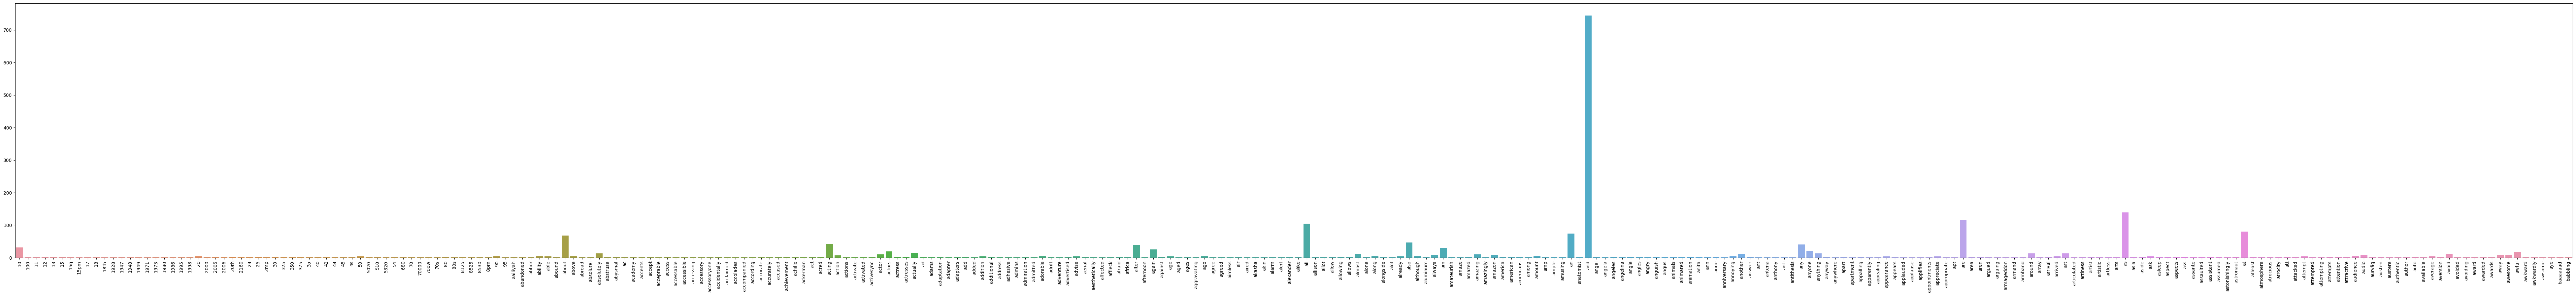

In [59]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# PLOTLY DRAW

In [91]:
import plotly.offline as py
import plotly.graph_objs as go

data= [go.Bar(
        x=count_vect.get_feature_names_out()[:300],#X軸˙
        y=term_frequencies[:300], #y軸欄位
       

        textposition = 'auto', #長條圖上標示資料數值的位子，有auto、inside、outside可以做設定
        marker=dict(
        color='rgb(158,202,225)', #長條圖填滿部分顏色設定
        line=dict(color='rgb(8,48,107)')) #長條圖外框顏色設定
)]

layout=go.Layout(
   title='Term_frequency', titlefont=dict(
         size=22, color='#7f7f7f'), #設定標題名稱、字體大小、顏色
    xaxis=dict(
        tickfont=dict(
            size=6, color='rgb(107, 107, 107)') #設定X軸名稱、字體大小、顏色
    ),
    yaxis=dict(
        tickfont=dict(
            size=8,color='rgb(107, 107, 107)' #設定Y軸標籤字體大小、顏色
        )
    ),margin=go.Margin(l=180,r=60,b=50,t=60,pad=0,) #調整圖表的位子
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig,filename='Frequency_by_PLOTLY.html')

E:\env\py39\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




'Frequency_by_PLOTLY.html'

# Long tail

E:\env\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[['10', 31], ['100', 1], ['11', 1], ['12', 2], ['13', 3]]


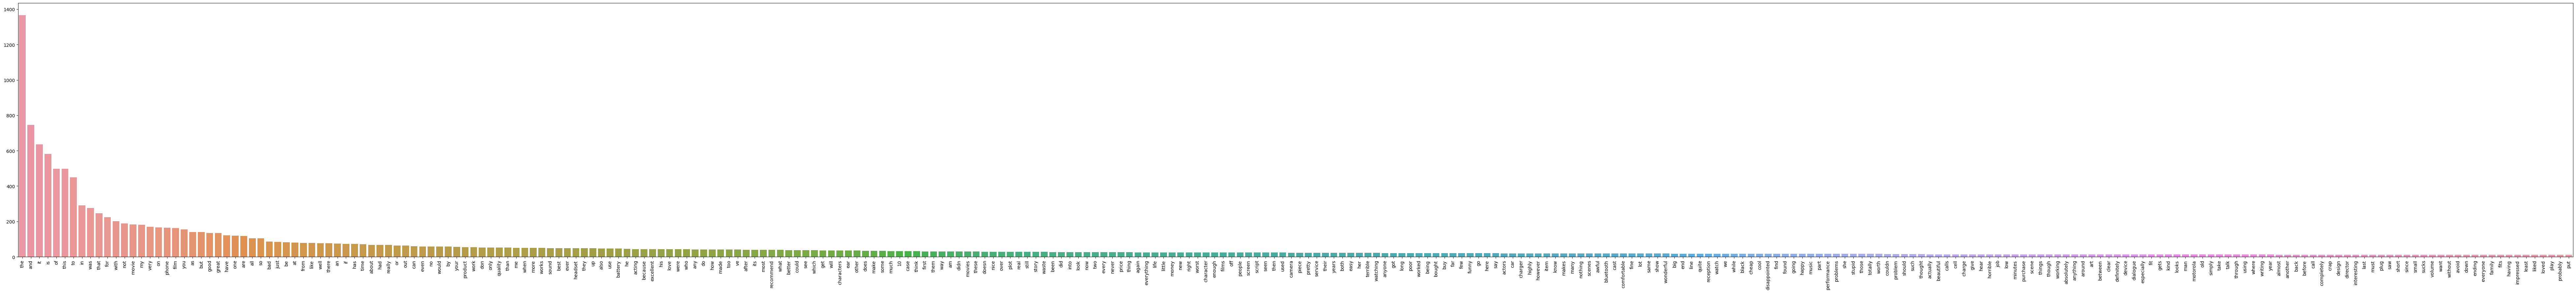

In [61]:
# Answer here
news=[] 
name=np.array(count_vect.get_feature_names())
for t,z in zip(name[0:],term_frequencies[0:]):
    news.append([t,z]) #把名稱跟累進frequency合併成一個list 方便我們做SORT
    
print(news[0:5])
news_sort=sorted(news,key=lambda row:(row[1]),reverse=True)
news_sort[0:5]
a=[i[0] for i in news_sort] #再次拆開成term 陣列
b=[i[1] for i in news_sort] #frequency陣列

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=a[:300], 
            y=b[:300])
g.set_xticklabels(a[:300], rotation = 90);

# 取LOG有效增加可視性

In [62]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

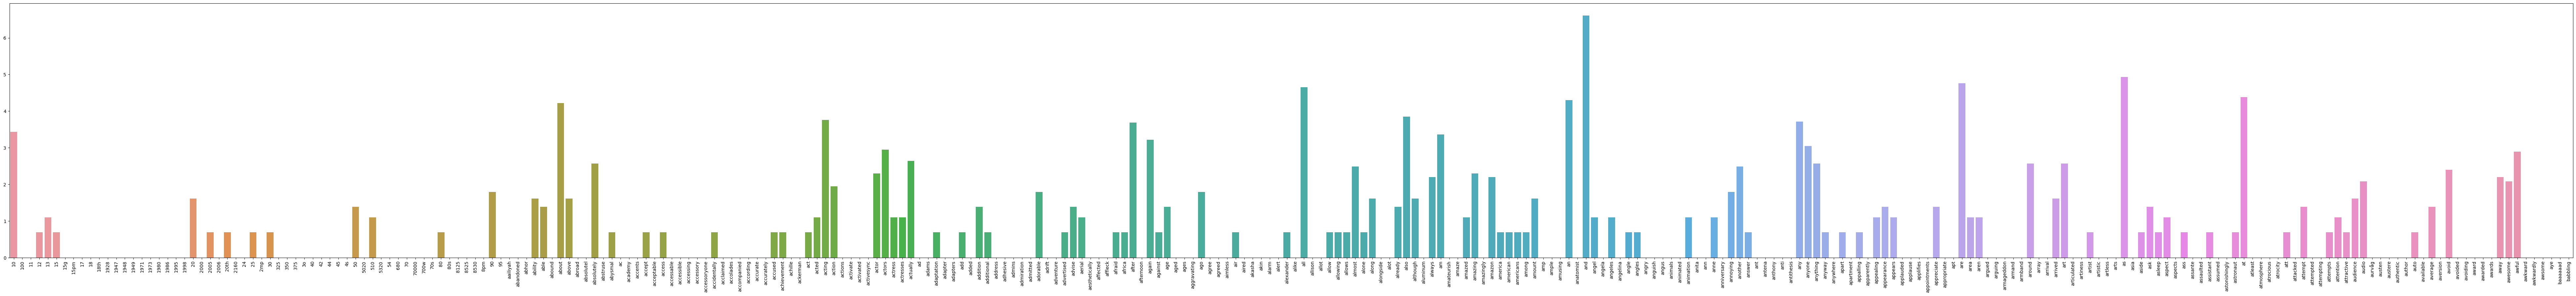

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

# Discretization and Binarization

In [64]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [65]:
mlb = preprocessing.LabelBinarizer()

In [66]:
mlb.fit(res.category)

LabelBinarizer()

In [67]:
res['bin_category'] = mlb.transform(res['category']).tolist()

In [68]:
res[0:9]  #因為本身就只有2種 我認為不需要特別做binary

,sentence,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Data Exploration

In [69]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = res.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = res.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = res.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [70]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [71]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


因為都沒有相同的字 所以similarity為0

# TF-IDF

In [73]:
#我們上面已經透過vectorizer取得了document matrix 現在直接來做TD-IDF處理
from sklearn.feature_extraction.text import TfidfTransformer

In [74]:
transF=TfidfTransformer()
print(transF)

TfidfTransformer()


In [75]:
res_counts

<1735x4100 sparse matrix of type '<class 'numpy.int64'>'
	with 20445 stored elements in Compressed Sparse Row format>

In [76]:
tfidf=transF.fit_transform(res_counts)

In [77]:
print(tfidf[0].toarray())
TF_ARR=tfidf.toarray()
type(TF_ARR[0][0])

[[0. 0. 0. ... 0. 0. 0.]]


numpy.float64

In [78]:
TF_ARR.shape

(1735, 4100)

# 找出TF-IDF後做naive bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
naive_bayes_classifier_TF = MultinomialNB()

In [81]:
naive_bayes_classifier_TF.fit(tfidf,res['category']) #用TF-IDF 做fit

MultinomialNB()

In [82]:
test_text=file2[0] #使用file2 做test

In [83]:
test_label=file2[1]

In [84]:
X_test=count_vect.transform(test_text)

In [85]:
y_predLable = naive_bayes_classifier_TF.predict(X_test)
print(metrics.classification_report(test_label, y_predLable,target_names=['Positive', 'Negative']))


              precision    recall  f1-score   support

    Positive       0.75      0.79      0.77       500
    Negative       0.78      0.74      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



# 用frequency 做 naive bayes

In [86]:
naive_bayes_classifier_FRE = MultinomialNB()

In [87]:
naive_bayes_classifier_FRE.fit(res_counts,res['category'])

MultinomialNB()

In [88]:
test_text=file2[0] #使用file2 做test
test_label=file2[1]

In [89]:
X_test=count_vect.transform(test_text)

In [90]:
y_predLable = naive_bayes_classifier_FRE.predict(X_test)

print(metrics.classification_report(test_label, y_predLable,target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.73      0.82      0.77       500
    Negative       0.79      0.70      0.74       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



-------------------------------------------
因為：
TF-IDF的計算
會把常出現的字跟所有文本中的字做比對，看看這個單詞是否就是在某個文本中最常出現(定義為有可能決定這個LABEL的關鍵
因此相較於直接拿frequency來做分類，因為只是單純的計算了所有單詞的頻率，可能會連THE,I,WHO,這類不成決定關鍵的詞
彙也計算進去，所以理論來說經過TF-IDF的處理會得到較好的成果。